# 3-body system: Sun, Earth, Spaceship

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class planet:
    
    def __init__(self, name, position, velocity, mass):
        
        '''
        Create an instance of a planet with some initial conditions. Also run some calculations to tell us important planetary properties
        '''
        
        self.name = name
        
        self.rx = position[0] # m
        self.ry = position[1] # m
        self.rz = 0 # position[2] # m

        self.vx = velocity[0] # m / s
        self.vy = velocity[1] # m / s
        self.vz = 0 # velocity[2] # m / s
        
        self.m = mass # kg
        
        self.px = self.m * self.vx # kg m / s
        self.py = self.m * self.vy # kg m / s
        self.pz = self.m * self.vz # kg m / s
        
        # Calculated values
        self.m_inv = 1 / self.m
        
        self.sphere_of_influence = np.power(self.rx ** 2 + self.ry ** 2 , 0.5) * np.power(self.m / 2e30, 0.4)
        
        # Leave space for future solutions
        self.sol_rx = np.array([])
        self.sol_ry = np.array([])
        self.sol_rz = np.array([])
        
        self.sol_px = np.array([])
        self.sol_py = np.array([])
        self.sol_pz = np.array([])
        
        self.sol_t = np.array([])
        
class spaceship:
    
    def __init__(self, name, position, velocity, rocket_params):
        
        '''
        Create an instance of a spaceship with some initial conditions. Also run some calculations to tell us important spaceship properties
        '''
        
        self.name = name
        
        self.rx = position[0] # m
        self.ry = position[1] # m
        self.rz = 0 # position[2] # m

        self.vx = velocity[0] # m / s
        self.vy = velocity[1] # m / s
        self.vz = 0 # velocity[2] # m / s
        
        self.dry_mass = rocket_params[0] # kg
        self.burn_rate = rocket_params[1] # kg / s of fuel burned
        self.total_mass = rocket_params[2] # kg of fuel initially
        self.fuel_mass = self.total_mass - self.dry_mass
        self.v_exhaust = rocket_params[3] # m / s Exhaust velocity of the gas
        self.burn_time = 0.5 * self.fuel_mass / self.burn_rate
        self.burn_angle = np.pi * rocket_params[4] / 180
        
        self.m = self.dry_mass + self.fuel_mass
        self.m_inv = 1 / self.m
        
        self.px = self.m * self.vx # kg m / s
        self.py = self.m * self.vy # kg m / s
        self.pz = self.m * self.vz # kg m / s
        
        # Leave space for future solutions
        self.sol_rx = np.array([])
        self.sol_ry = np.array([])
        self.sol_rz = np.array([])
        
        self.sol_px = np.array([])
        self.sol_py = np.array([])
        self.sol_pz = np.array([])
        
        self.sol_t = np.array([])

In [2]:
Sun     = planet(name = 'Sun',     position = [0, 0, 0],             velocity = [0, 0, 0],        mass = 2e30)
Earth   = planet(name = 'Earth',   position = [0,1.5e11, 0],         velocity = [-29.78e3, 0, 0], mass = 6e24)

rocket_params = [1e3, 1e3, 6e5, 3e3, 10] # dry mass, burn rate, total mass, v_exh, burn angle
Spaceship = spaceship(name = 'Spaceship', position = [0, 1.5e11 + 4e8, 0], velocity = [-(31.5e3), 0 , 0], rocket_params = rocket_params)

objects = [Sun, Earth, Spaceship]

end_time = 2e6
time_steps = int(1e6)

<Figure size 640x480 with 0 Axes>

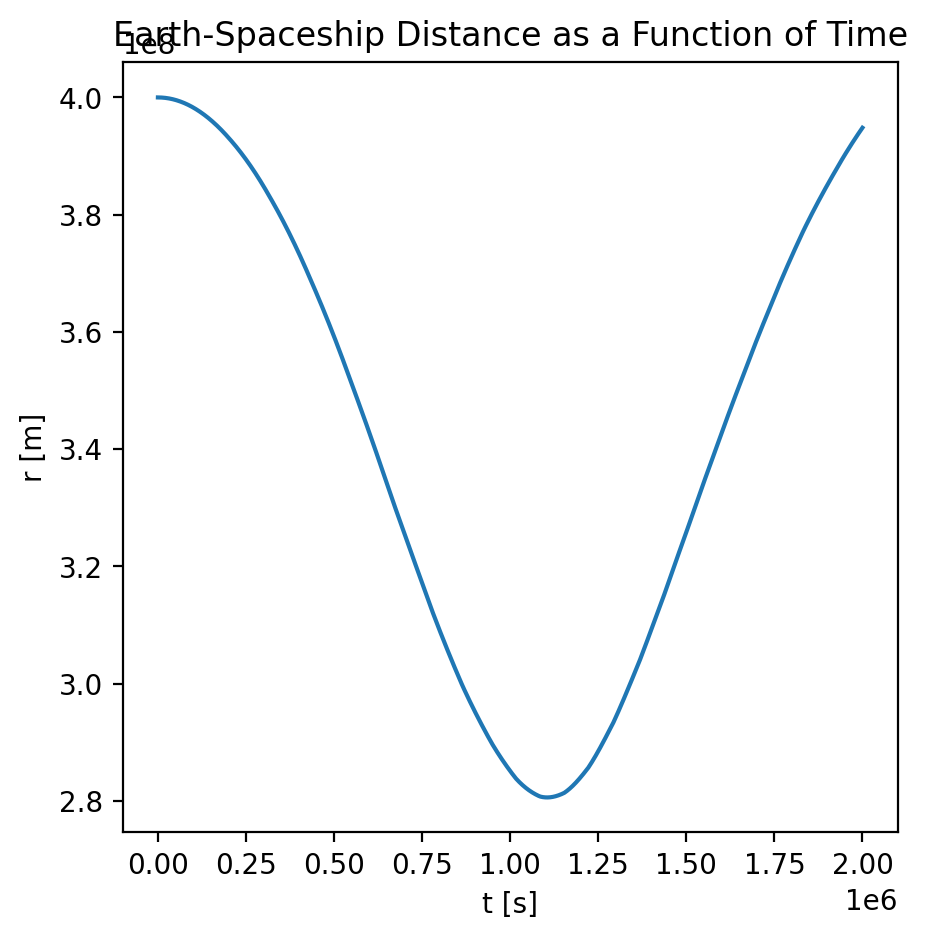

<Figure size 640x480 with 0 Axes>

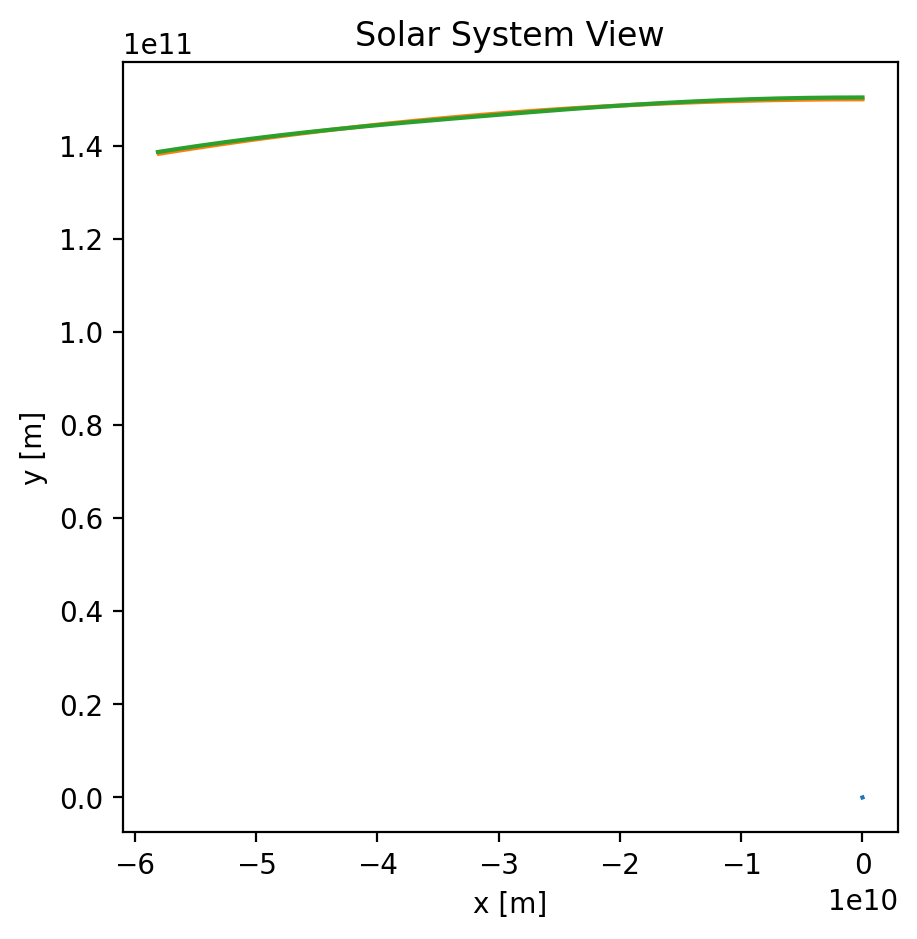

<Figure size 640x480 with 0 Axes>

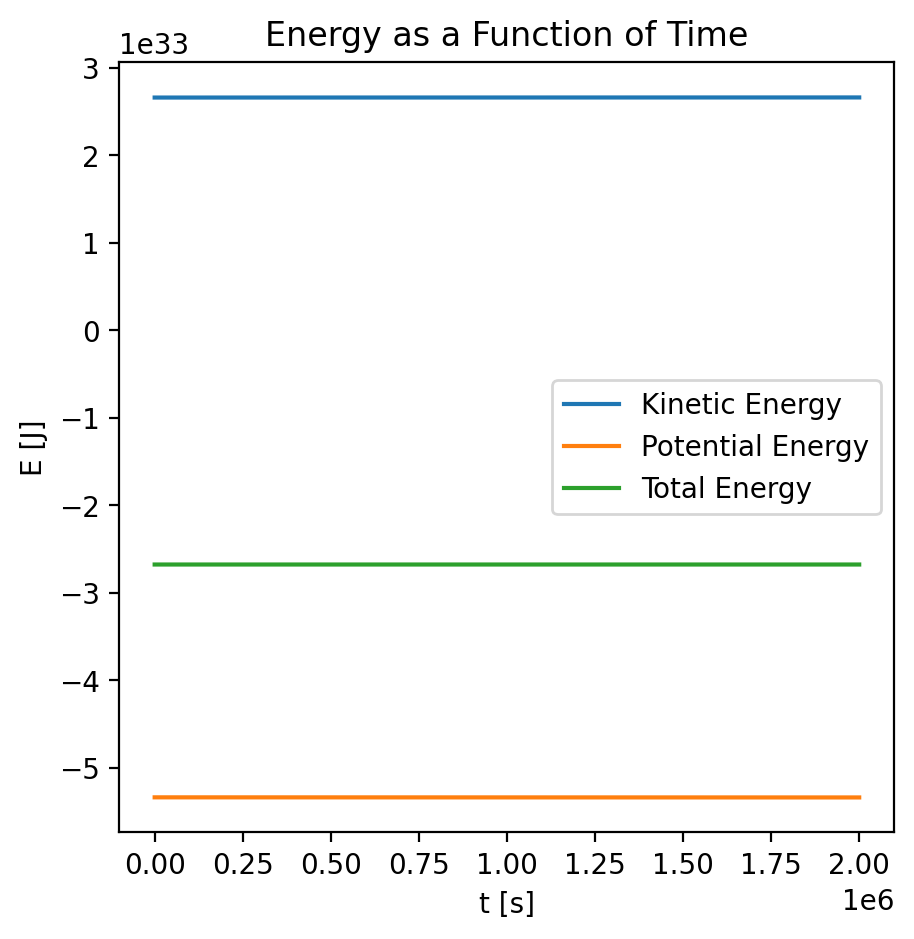

In [3]:
def f(t,y):
    '''This function creates the ODE function for the scipy integrator without rocket burn.'''
    
    G = 6.67e-11
    
    # Defining the masses 
    m = np.array([0])
    for o in range(len(objects)):
        m = np.append(m, objects[o].m)
    
    ###################### 
    # Variable definitions 
    ###################### 
    
    # Sun variable definitions 
    x1 = y[0]
    y1 = y[1]
    z1 = y[2]
    px1 = y[3]
    py1 = y[4]
    pz1 = y[5]    
    
    # Earth variable definitions 
    x2 = y[6]
    y2 = y[7]
    z2 = y[8]
    px2 = y[9]
    py2 = y[10]
    pz2 = y[11]    
    
    # Spaceship variable definitions 
    x3 = y[12]
    y3 = y[13]
    z3 = y[14]
    px3 = y[15]
    py3 = y[16]
    pz3 = y[17]    

    ######################## 
    # Derivative definitions 
    ######################## 
    
    # Sun derivative definitions 
    dx1 = px1 / m[1]
    dy1 = py1 / m[1]
    dz1 = pz1 / m[1]
    dpx1 = -G * m[1] * ( m[2] * (x1 - x2) / (((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2) ** (3/2)) + m[3] * (x1 - x3) / (((x1 - x3)**2 + (y1 - y3)**2 + (z1 - z3)**2) ** (3/2)) )
    dpy1 = -G * m[1] * ( m[2] * (y1 - y2) / (((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2) ** (3/2)) + m[3] * (y1 - y3) / (((x1 - x3)**2 + (y1 - y3)**2 + (z1 - z3)**2) ** (3/2)) )
    dpz1 = -G * m[1] * ( m[2] * (z1 - z2) / (((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2) ** (3/2)) + m[3] * (z1 - z3) / (((x1 - x3)**2 + (y1 - y3)**2 + (z1 - z3)**2) ** (3/2)) )
    
    # Earth derivative definitions 
    dx2 = px2 / m[2]
    dy2 = py2 / m[2]
    dz2 = pz2 / m[2]
    dpx2 = -G * m[2] * ( m[1] * (x2 - x1) / (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2) ** (3/2)) + m[3] * (x2 - x3) / (((x2 - x3)**2 + (y2 - y3)**2 + (z2 - z3)**2) ** (3/2)) )
    dpy2 = -G * m[2] * ( m[1] * (y2 - y1) / (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2) ** (3/2)) + m[3] * (y2 - y3) / (((x2 - x3)**2 + (y2 - y3)**2 + (z2 - z3)**2) ** (3/2)) )
    dpz2 = -G * m[2] * ( m[1] * (z2 - z1) / (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2) ** (3/2)) + m[3] * (z2 - z3) / (((x2 - x3)**2 + (y2 - y3)**2 + (z2 - z3)**2) ** (3/2)) )
    
    # Spaceship derivative definitions 
    dx3 = px3 / m[3]
    dy3 = py3 / m[3]
    dz3 = pz3 / m[3]
    dpx3 = -G * m[3] * ( m[1] * (x3 - x1) / (((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2) ** (3/2)) + m[2] * (x3 - x2) / (((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2) ** (3/2)) )
    dpy3 = -G * m[3] * ( m[1] * (y3 - y1) / (((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2) ** (3/2)) + m[2] * (y3 - y2) / (((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2) ** (3/2)) )
    dpz3 = -G * m[3] * ( m[1] * (z3 - z1) / (((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2) ** (3/2)) + m[2] * (z3 - z2) / (((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2) ** (3/2)) )
        
    return np.array([dx1, dy1, dz1, dpx1, dpy1, dpz1, dx2, dy2, dz2, dpx2, dpy2, dpz2, dx3, dy3, dz3, dpx3, dpy3, dpz3])

# Defining in initial conditions
y0 = np.array([0, 0, 0, 0.0, 0.0, 0.0, 0, 150000000000.0, 0, -1.7868e+29, 0.0, 0.0, 0, 150400000000.0, 0, -1.84212e10, 0.0, 0.0])
t_span = [0,2e6]
t_eval = np.linspace(0, 2e6, 1000000)

# Running the ODE solver
sol = solve_ivp(f, t_span, y0, method='LSODA', t_eval=t_eval, min_step=1)

# Saving the solutions
t = sol.t
# Assigning solutions for Sun
objects[0].sol_rx = sol.y[0]
objects[0].sol_ry = sol.y[1]
objects[0].sol_rz = sol.y[2]
objects[0].sol_px = sol.y[3]
objects[0].sol_py = sol.y[4]
objects[0].sol_pz = sol.y[5]
objects[0].sol_t = sol.t

# Assigning solutions for Earth
objects[1].sol_rx = sol.y[6]
objects[1].sol_ry = sol.y[7]
objects[1].sol_rz = sol.y[8]
objects[1].sol_px = sol.y[9]
objects[1].sol_py = sol.y[10]
objects[1].sol_pz = sol.y[11]
objects[1].sol_t = sol.t

# Assigning solutions for Spaceship
objects[2].sol_rx = sol.y[12]
objects[2].sol_ry = sol.y[13]
objects[2].sol_rz = sol.y[14]
objects[2].sol_px = sol.y[15]
objects[2].sol_py = sol.y[16]
objects[2].sol_pz = sol.y[17]
objects[2].sol_t = sol.t

############
# Some plots
############

# Plot Distance of the Spaceship from Earth.
plt.figure()
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Spaceship.sol_t, ((Spaceship.sol_ry-Earth.sol_ry)**2 + (Spaceship.sol_rx-Earth.sol_rx)**2)**(1/2))
plt.xlabel('t [s]')
plt.ylabel('r [m]')
plt.title('Earth-Spaceship Distance as a Function of Time')
plt.show()

# Solar System View
plt.figure()
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Sun.sol_rx, Sun.sol_ry, label='Sun')
plt.plot(Earth.sol_rx, Earth.sol_ry, label='Earth')
plt.plot(Spaceship.sol_rx, Spaceship.sol_ry, label='Spaceship')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Solar System View')
plt.show()

########
# Energy
########

G = 6.67e-11

KE = 0.5 * (Sun.sol_px**2 + Sun.sol_py**2) * Sun.m_inv + 0.5 * (Earth.sol_px**2 + Earth.sol_py**2) * Earth.m_inv + 0.5 * (Spaceship.sol_px**2 + Spaceship.sol_py**2) * Spaceship.m_inv
PE = -G * (Sun.m * Earth.m / ((Sun.sol_rx - Earth.sol_rx) ** 2 + (Sun.sol_ry - Earth.sol_ry) ** 2)**(1/2)) # I ignore the very light spacecraft

plt.figure()
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Earth.sol_t, KE, label='Kinetic Energy')
plt.plot(Earth.sol_t, PE, label='Potential Energy')
plt.plot(Earth.sol_t, PE + KE, label='Total Energy')
plt.xlabel('t [s]')
plt.ylabel('E [J]')
plt.title('Energy as a Function of Time')
plt.legend()
plt.show()




Now for a little longer time...

<Figure size 640x480 with 0 Axes>

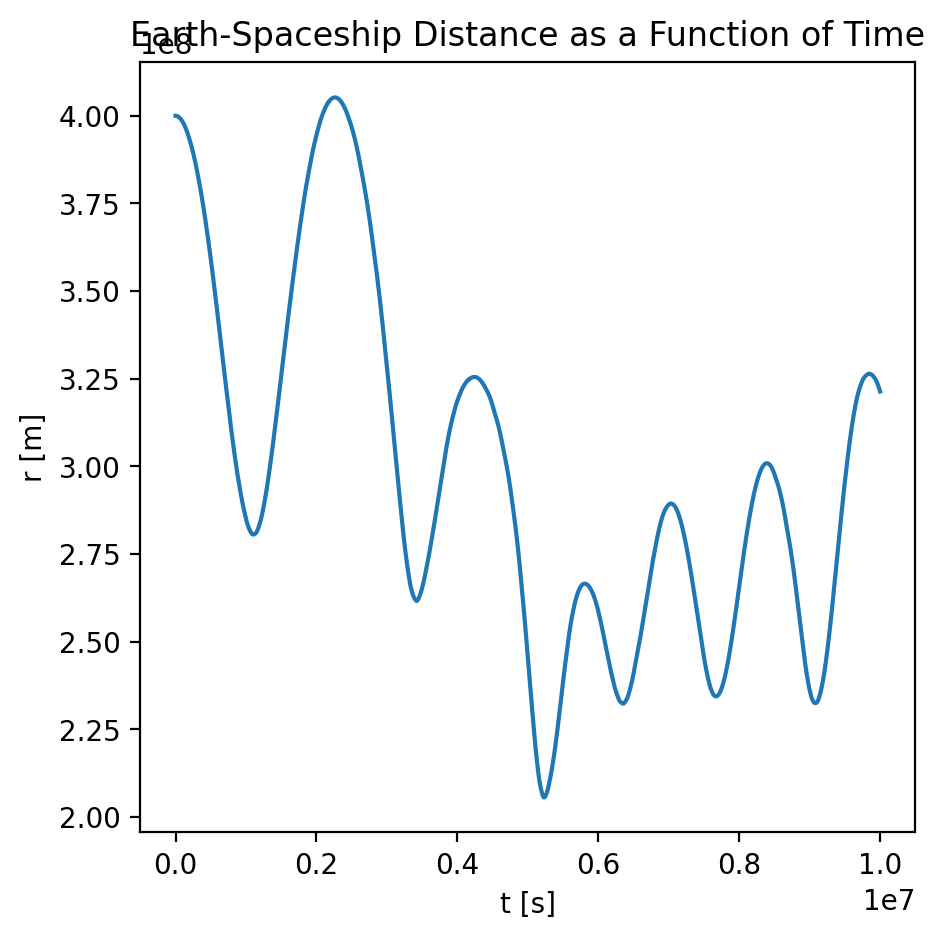

<Figure size 640x480 with 0 Axes>

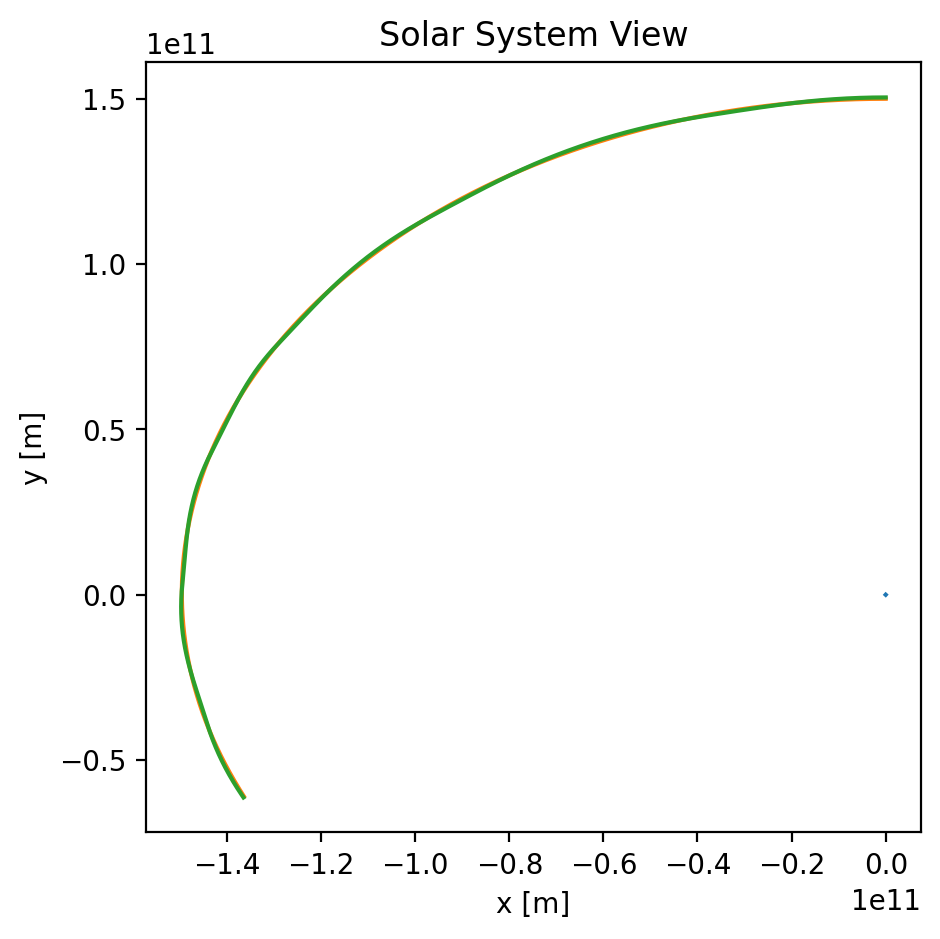

<Figure size 640x480 with 0 Axes>

In [ ]:
def f(t,y):
    '''This function creates the ODE function for the scipy integrator without rocket burn.'''
    
    G = 6.67e-11
    
    # Defining the masses 
    m = np.array([0])
    for o in range(len(objects)):
        m = np.append(m, objects[o].m)
    
    ###################### 
    # Variable definitions 
    ###################### 
    
    # Sun variable definitions 
    x1 = y[0]
    y1 = y[1]
    z1 = y[2]
    px1 = y[3]
    py1 = y[4]
    pz1 = y[5]    
    
    # Earth variable definitions 
    x2 = y[6]
    y2 = y[7]
    z2 = y[8]
    px2 = y[9]
    py2 = y[10]
    pz2 = y[11]    
    
    # Spaceship variable definitions 
    x3 = y[12]
    y3 = y[13]
    z3 = y[14]
    px3 = y[15]
    py3 = y[16]
    pz3 = y[17]    

    ######################## 
    # Derivative definitions 
    ######################## 
    
    # Sun derivative definitions 
    dx1 = px1 / m[1]
    dy1 = py1 / m[1]
    dz1 = pz1 / m[1]
    dpx1 = -G * m[1] * ( m[2] * (x1 - x2) / (((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2) ** (3/2)) + m[3] * (x1 - x3) / (((x1 - x3)**2 + (y1 - y3)**2 + (z1 - z3)**2) ** (3/2)) )
    dpy1 = -G * m[1] * ( m[2] * (y1 - y2) / (((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2) ** (3/2)) + m[3] * (y1 - y3) / (((x1 - x3)**2 + (y1 - y3)**2 + (z1 - z3)**2) ** (3/2)) )
    dpz1 = -G * m[1] * ( m[2] * (z1 - z2) / (((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2) ** (3/2)) + m[3] * (z1 - z3) / (((x1 - x3)**2 + (y1 - y3)**2 + (z1 - z3)**2) ** (3/2)) )
    
    # Earth derivative definitions 
    dx2 = px2 / m[2]
    dy2 = py2 / m[2]
    dz2 = pz2 / m[2]
    dpx2 = -G * m[2] * ( m[1] * (x2 - x1) / (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2) ** (3/2)) + m[3] * (x2 - x3) / (((x2 - x3)**2 + (y2 - y3)**2 + (z2 - z3)**2) ** (3/2)) )
    dpy2 = -G * m[2] * ( m[1] * (y2 - y1) / (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2) ** (3/2)) + m[3] * (y2 - y3) / (((x2 - x3)**2 + (y2 - y3)**2 + (z2 - z3)**2) ** (3/2)) )
    dpz2 = -G * m[2] * ( m[1] * (z2 - z1) / (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2) ** (3/2)) + m[3] * (z2 - z3) / (((x2 - x3)**2 + (y2 - y3)**2 + (z2 - z3)**2) ** (3/2)) )
    
    # Spaceship derivative definitions 
    dx3 = px3 / m[3]
    dy3 = py3 / m[3]
    dz3 = pz3 / m[3]
    dpx3 = -G * m[3] * ( m[1] * (x3 - x1) / (((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2) ** (3/2)) + m[2] * (x3 - x2) / (((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2) ** (3/2)) )
    dpy3 = -G * m[3] * ( m[1] * (y3 - y1) / (((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2) ** (3/2)) + m[2] * (y3 - y2) / (((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2) ** (3/2)) )
    dpz3 = -G * m[3] * ( m[1] * (z3 - z1) / (((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2) ** (3/2)) + m[2] * (z3 - z2) / (((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2) ** (3/2)) )
        
    return np.array([dx1, dy1, dz1, dpx1, dpy1, dpz1, dx2, dy2, dz2, dpx2, dpy2, dpz2, dx3, dy3, dz3, dpx3, dpy3, dpz3])

# Defining in initial conditions
y0 = np.array([0, 0, 0, 0.0, 0.0, 0.0, 0, 150000000000.0, 0, -1.7868e+29, 0.0, 0.0, 0, 150400000000.0, 0, -1.84212e10, 0.0, 0.0])
t_span = [0,1e7]
t_eval = np.linspace(0, 1e7, 1000000)

# Running the ODE solver
sol = solve_ivp(f, t_span, y0, method='LSODA', t_eval=t_eval, min_step=1)

# Saving the solutions
t = sol.t
# Assigning solutions for Sun
objects[0].sol_rx = sol.y[0]
objects[0].sol_ry = sol.y[1]
objects[0].sol_rz = sol.y[2]
objects[0].sol_px = sol.y[3]
objects[0].sol_py = sol.y[4]
objects[0].sol_pz = sol.y[5]
objects[0].sol_t = sol.t

# Assigning solutions for Earth
objects[1].sol_rx = sol.y[6]
objects[1].sol_ry = sol.y[7]
objects[1].sol_rz = sol.y[8]
objects[1].sol_px = sol.y[9]
objects[1].sol_py = sol.y[10]
objects[1].sol_pz = sol.y[11]
objects[1].sol_t = sol.t

# Assigning solutions for Spaceship
objects[2].sol_rx = sol.y[12]
objects[2].sol_ry = sol.y[13]
objects[2].sol_rz = sol.y[14]
objects[2].sol_px = sol.y[15]
objects[2].sol_py = sol.y[16]
objects[2].sol_pz = sol.y[17]
objects[2].sol_t = sol.t

############
# Some plots
############

# Plot Distance of the Spaceship from Earth.
plt.figure()
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Spaceship.sol_t, ((Spaceship.sol_ry-Earth.sol_ry)**2 + (Spaceship.sol_rx-Earth.sol_rx)**2)**(1/2))
plt.xlabel('t [s]')
plt.ylabel('r [m]')
plt.title('Earth-Spaceship Distance as a Function of Time')
plt.show()

# Solar System View
plt.figure()
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Sun.sol_rx, Sun.sol_ry, label='Sun')
plt.plot(Earth.sol_rx, Earth.sol_ry, label='Earth')
plt.plot(Spaceship.sol_rx, Spaceship.sol_ry, label='Spaceship')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Solar System View')
plt.show()

########
# Energy
########

G = 6.67e-11

KE = 0.5 * (Sun.sol_px**2 + Sun.sol_py**2) * Sun.m_inv + 0.5 * (Earth.sol_px**2 + Earth.sol_py**2) * Earth.m_inv + 0.5 * (Spaceship.sol_px**2 + Spaceship.sol_py**2) * Spaceship.m_inv
PE = -G * (Sun.m * Earth.m / ((Sun.sol_rx - Earth.sol_rx) ** 2 + (Sun.sol_ry - Earth.sol_ry) ** 2)**(1/2)) # I ignore the very light spacecraft

plt.figure()
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Earth.sol_t, KE, label='Kinetic Energy')
plt.plot(Earth.sol_t, PE, label='Potential Energy')
plt.plot(Earth.sol_t, PE + KE, label='Total Energy')
plt.xlabel('t [s]')
plt.ylabel('E [J]')
plt.title('Energy as a Function of Time')
plt.legend()
plt.show()




I am happy with this initial conditions. They aren't perfect but they are stable for 4 months and will be all I need to start launching rockets. 